# **Sprint 4**
O dataset que será utilizado é o que criamos durante a Sprint 3, no qual geramos 100 conversas e respostas diretamente por meio do chatbot. Agora, vamos desenvolver um modelo de aprendizado supervisionado utilizando a técnica TF-IDF e Árvore de decisão

In [40]:
import pandas as pd

# Carregando o dataset da Sprint 3
file_path = 'sprint4.xlsx'
df = pd.read_excel(file_path)

# Visualização das primeiras linhas do df
df.head()

,id,Seja bem-vindo ao ChatMech! Como posso ajudar você com a manutenção do seu veículo?,Qual foi a ultima revisão feita no seu veiculo ?,Qual é o modelo e ano do seu veículo?,Você prefere realizar o serviço em uma mecânica próxima de sua localização atual ou está aberto a sugestões em outras áreas?,Gostaria de receber uma estimativa de custo para as peças e o serviço?,"Você está interessado em opções de peças novas, usadas ou remanufaturadas?",Precisa de informações sobre o horário de funcionamento ou o agendamento para o serviço?,Há mais alguma informação que você precisa ou algo específico que gostaria de perguntar sobre o serviço ou as peças?,Você está procurando algum tipo de garantia ou suporte pós-serviço?,Há algum detalhe adicional ou condição especial que devemos saber para melhor atender seu veículo?,Classificação do problema,Estimativa de valor
0,1,Estou procurando uma revisão completa para o m...,Fiz uma revisão geral há cerca de 10.000 km.,Meu carro é um Ford Fiesta 2018.,Prefiro uma mecânica próxima de casa.,"Sim, gostaria de saber quanto vou gastar.","Prefiro peças novas, mas aceito sugestões.","Sim, preciso saber o horário e agendar.","Não, apenas isso.","Sim, gostaria de garantir que o serviço tenha ...","Não, tudo está normal com o carro.",Revisao geral,500
1,2,Estou buscando uma troca de óleo e alinhamento.,Troquei o óleo há 5.000 km e fiz o alinhamento...,Meu carro é um Toyota Corolla 2019.,Estou aberto a sugestões em outras áreas.,"Sim, uma estimativa seria ótima.",Prefiro peças novas.,"Sim, por favor, informe o horário e agende.","Sim, tenho uma dúvida sobre a qualidade das pe...","Sim, gostaria de saber sobre garantias.","Nada em especial, só o alinhamento e troca de ...",Troca de oleo e filtros,150
2,3,Quero fazer a revisão completa e a troca de pn...,A última revisão foi há 8.000 km e inclui troc...,É um Volkswagen Golf 2020.,Prefiro uma mecânica próxima de casa.,"Sim, uma estimativa ajudaria.",Peças novas para os pneus.,"Sim, preciso saber o horário e agendar.",Gostaria de saber mais sobre o tipo de pneus u...,"Sim, quero uma garantia para o serviço.","Nada em especial, apenas a revisão e troca de ...",Revisao geral,600
3,4,Preciso de um serviço de alinhamento e balance...,Fiz o alinhamento há 6.000 km e o balanceament...,É um Chevrolet Onix 2018.,Prefiro uma mecânica próxima de casa.,"Sim, uma estimativa de custo é importante.",Prefiro peças novas para o balanceamento.,"Sim, quero saber o horário e agendar o serviço.","Não, apenas isso.","Sim, gostaria de um suporte pós-serviço.","Nada em especial, só o alinhamento e balanceam...",Manutencao de suspensao e direcao,120
4,5,Estou procurando uma revisão do sistema de ar-...,Fiz a última revisão do ar-condicionado há 12....,Meu carro é um Hyundai HB20 2017.,Estou aberto a sugestões em outras áreas.,"Sim, gostaria de uma estimativa de custo.",Peças novas para o sistema de ar-condicionado.,"Sim, preciso saber o horário e agendar.",Quero saber mais sobre a qualidade das peças u...,"Sim, desejo uma garantia para o serviço.","Não, apenas a revisão do ar-condicionado.",Sistema de arrefecimento e ar-condicionado,200


# **Análise dos dados**
Vamos realizar uma análise dos dados para vermos se há algum dado faltante e com o que estamos trabalhando.

In [41]:
# Verificação dos dados e se há algum dado nulo
print('Resumo das colunas do Df:\n')
df.info()

Resumo das colunas do Df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   id                                                                                                                            100 non-null    int64 
 1   Seja bem-vindo ao ChatMech! Como posso ajudar você com a manutenção do seu veículo?                                           100 non-null    object
 2   Qual foi a ultima revisão feita no seu veiculo ?                                                                              100 non-null    object
 3   Qual é o modelo e ano do seu veículo?                                                         

In [42]:
# Distribuição das classificações dos problemas
print('Distribuição das classes target:\n')
df['Classificação do problema'].value_counts()

Distribuição das classes target:



Classificação do problema
Revisao geral                                 34
Manutencao de suspensao e direcao             20
Sistema de arrefecimento e ar-condicionado    19
Troca de oleo e filtros                       18
Sistema de freios                              9
Name: count, dtype: int64

In [43]:
# Nosso Df há uma coluna de estimativa de valor do serviço, e veremos as estatísticas dela
print('Resumo estatístico da coluna de estimativa de valor do Df:\n')
df.describe()

Resumo estatístico da coluna de estimativa de valor do Df:



,id,Estimativa de valor
count,100.000000,100.000000
mean,50.500000,253.000000
std,29.011492,105.385296
min,1.000000,100.000000
25%,25.750000,180.000000
50%,50.500000,220.000000
75%,75.250000,300.000000
max,100.000000,600.000000


# **Pré-processamento dos Dados**
Nesta etapa, vamos unificar todas as colunas de entrada em uma única coluna de texto e converter o texto em uma representação numérica utilizando TF-IDF. Isso vai facilitar a aplicação do meu modelo de aprendizado supervisionado.

In [44]:
# Vamos concatenar todas as colunas em uma só, para termos uma representação unificada dos problemas
df['unificação'] = df.drop(columns=['Classificação do problema']).apply(lambda x: ' '.join(x.astype(str)), axis=1)
df['unificação'].head()

# Vamos separar as variáveis independentes (x) e as dependentes (y)
x = df['unificação']
y = df['Classificação do problema']

In [45]:
# Visualização dos dados x e y
x.head(), y.head()

(0    1 Estou procurando uma revisão completa para o...
 1    2 Estou buscando uma troca de óleo e alinhamen...
 2    3 Quero fazer a revisão completa e a troca de ...
 3    4 Preciso de um serviço de alinhamento e balan...
 4    5 Estou procurando uma revisão do sistema de a...
 Name: unificação, dtype: object,
 0                                 Revisao geral
 1                       Troca de oleo e filtros
 2                                 Revisao geral
 3             Manutencao de suspensao e direcao
 4    Sistema de arrefecimento e ar-condicionado
 Name: Classificação do problema, dtype: object)

# **Agora vamos fazer a vetorização utilizando o TF-IDF**
Vamos fazer a importação da biblioteca nltk e o download do StopWords, onde irá fazer a remoção das palavras comuns da nossa linguagem e que não irão carregar nenhum significado semântico, como por exemplo: Artigos, Pronomes, Preposições, Conjunções e Advérbios

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# Vamos fazer os calculos do TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

# Conversão dos textos em representações TF-IDF
vetor_tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), max_features=100)
x_tfidf = vetor_tfidf.fit_transform(x)

# Palavras mais importantes para o TF-IDF
nomes_importantes = vetor_tfidf.get_feature_names_out()

# Criando um Df para melhor visualização
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns = nomes_importantes)
df_tfidf.head()


,000,10,12,14,15,150,18,180,20,200,...,traseira,troca,trocados,verificado,verificação,volkswagen,áreas,óleo,última,útil
0,0.080593,0.23985,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.099022,0.00000,0.000000,0.0,0.0,0.143932,0.0,0.0,0.0,0.000000,...,0.0,0.209789,0.0,0.0,0.0,0.000000,0.087385,0.477863,0.000000,0.0
2,0.077435,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.492166,0.0,0.0,0.0,0.256507,0.000000,0.000000,0.121734,0.0
3,0.127250,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.047617,0.00000,0.124728,0.0,0.0,0.000000,0.0,0.0,0.0,0.127171,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.084043,0.000000,0.074858,0.0


# **Dividindo o conjunto de dados**
Nesse processo iremos dividir o treino e teste

In [48]:
from sklearn.model_selection import train_test_split

# Vamos dividir o treino e o teste usando o TF-IDF
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Calcular TF-IDF apenas no conjunto de treinamento
x_treino_tfidf = vetor_tfidf.fit_transform(x_treino)

# Transformar o conjunto de teste com o mesmo vetor TF-IDF
x_teste_tfidf = vetor_tfidf.transform(x_teste)

# **Treinando a árvore de decisão**

In [49]:
from sklearn.tree import DecisionTreeClassifier

modelo_tfidf = DecisionTreeClassifier(random_state=42)
modelo_tfidf.fit(x_treino_tfidf, y_treino)

DecisionTreeClassifier(random_state=42)

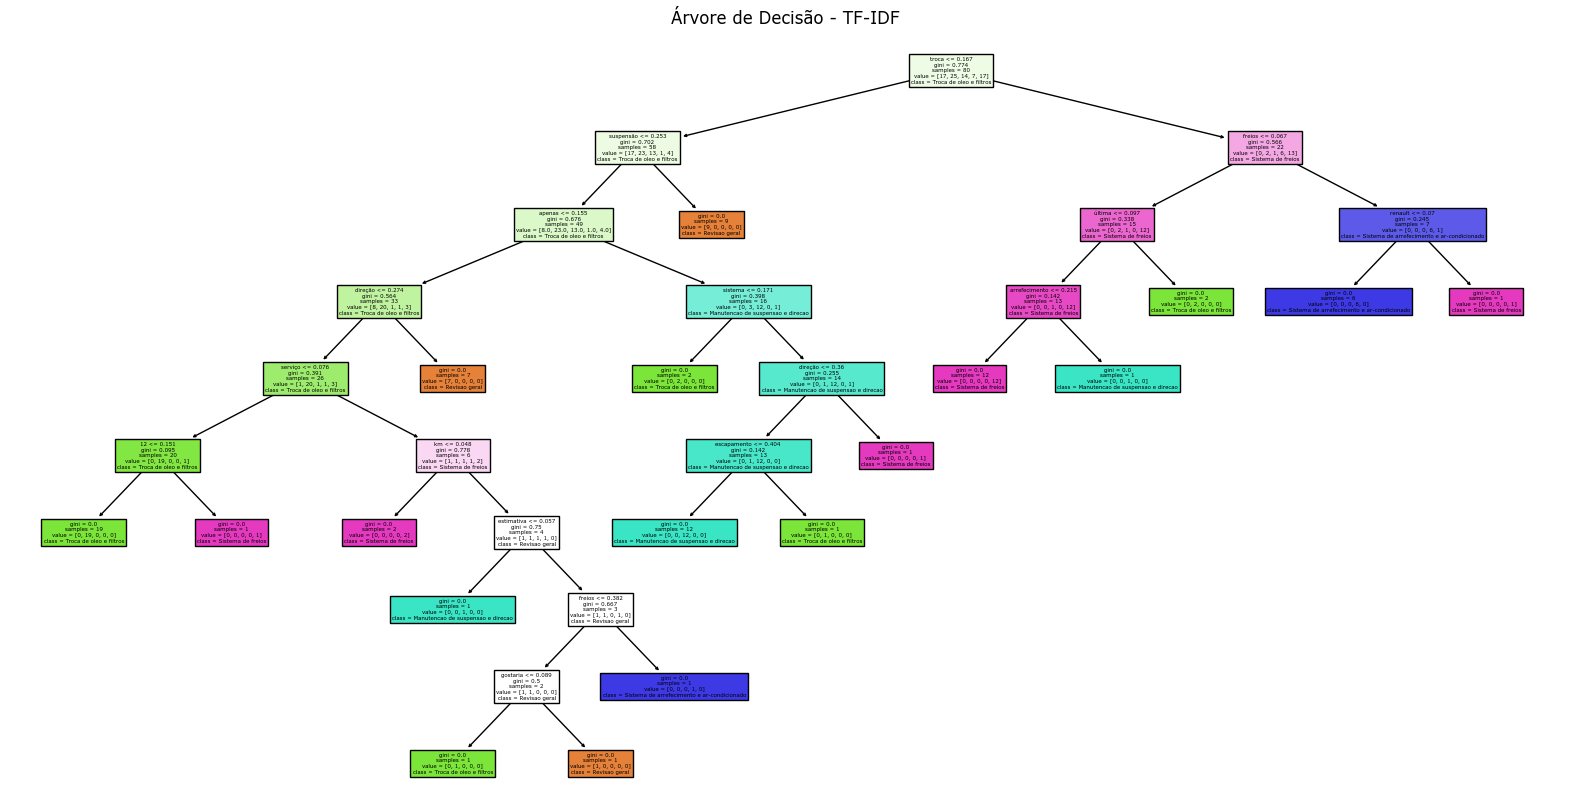

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão graficamente para o modelo treinado com TF-IDF
plt.figure(figsize=(20, 10))
plot_tree(modelo_tfidf, filled=True, feature_names=vetor_tfidf.get_feature_names_out(), class_names=y.unique().astype(str))
plt.title("Árvore de Decisão - TF-IDF")
plt.show()

# **Avaliação do modelo**

In [51]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões no conjunto de teste
y_pred_tfidf = modelo_tfidf.predict(x_teste_tfidf)

# Avaliar o modelo com TF-IDF
print("\nRelatório de Classificação (TF-IDF):")
print(classification_report(y_teste, y_pred_tfidf))

print("\nAcurácia do modelo (TF-IDF):")
print(accuracy_score(y_teste, y_pred_tfidf))


Relatório de Classificação (TF-IDF):
                                            precision    recall  f1-score   support

         Manutencao de suspensao e direcao       0.75      1.00      0.86         3
                             Revisao geral       0.83      0.56      0.67         9
Sistema de arrefecimento e ar-condicionado       0.80      0.80      0.80         5
                         Sistema de freios       1.00      1.00      1.00         2
                   Troca de oleo e filtros       0.33      1.00      0.50         1

                                  accuracy                           0.75        20
                                 macro avg       0.74      0.87      0.76        20
                              weighted avg       0.80      0.75      0.75        20


Acurácia do modelo (TF-IDF):
0.75


# **Simulando uma nova conversa**

In [67]:
# Dicionário da nova conversa
nova_conversa = {
    'Seja bem-vindo ao ChatMech! Como posso ajudar você com a manutenção do seu veículo?' : 'Meu carro está com problema na suspensão traseira',
    'Qual foi a última revisão feita no seu veículo?' : 'A última revisão na suspensão foi com 15.000 km.',
    'Qual é o modelo e ano do seu veículo?' : 'Meu veículo é um Honda Civic 2020.',
    'Você está interessado em opções de peças novas, usadas ou remanufaturadas?' : 'Prefiro peças novas.',
    'Há algum detalhe adicional ou condição especial que devemos saber para melhor atender seu veículo?' : 'Não.'
}

# Converter a nova conversa em um DataFrame
nova_conversa_df = pd.DataFrame([nova_conversa])

# Concatenar as colunas da nova conversa para criar uma representação unificada
nova_conversa_df['unificação'] = nova_conversa_df.apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Converter o texto da nova conversa para TF-IDF
try:
    nova_conversa_tfidf = vetor_tfidf.transform(nova_conversa_df['unificação'])

    # Fazer a previsão usando o modelo treinado
    predicao_nova_conversa = modelo_tfidf.predict(nova_conversa_tfidf)

    # Mostrar a previsão
    print(f"Previsão para a nova conversa: {predicao_nova_conversa[0]}")
except Exception as e:
    print(f"Ocorreu um erro durante a previsão: {e}")


Previsão para a nova conversa: Manutencao de suspensao e direcao


# Salvando o **modelo**

In [53]:
import pickle

# Salva o modelo TF-IDF
with open('modelo_tfidf.pkl', 'wb') as modelo_file:
    pickle.dump(modelo_tfidf, modelo_file)

# Salva o vetor TF-IDF
with open('vetor_tfidf.pkl', 'wb') as vetor_file:
    pickle.dump(vetor_tfidf, vetor_file)

# **Carregando o modelo**

In [54]:
# Carregar o modelo e o vetor TF-IDF
with open('modelo_tfidf.pkl', 'rb') as modelo_file:
    modelo_tfidf = pickle.load(modelo_file)

with open('vetor_tfidf.pkl', 'rb') as vetor_file:
    vetor_tfidf = pickle.load(vetor_file)
